# Mod 4 Project - Chest X-rays
- 06/12/20
## ~~42B Optimizing Neural Networks~~

> Indented block


- Callbacks, gridsearchm, etc

# Loading in the data


- [~~DATASET: Zip File for Dog vs Cats~~](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)
- [Dataset: Chest X_RAYS](https://drive.google.com/file/d/1plD05YMq0YDwFH_Xf265emxELQBrH95D/view?usp=sharing)


- [Google Drive Link to zip file](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4 )


In [18]:
# !pip install -U fsds
from fsds.imports import *

In [3]:
import os,glob
print(os.path.abspath(os.curdir))

/Users/jamesirving/Documents/GitHub/_MOD PROJECTS/Mine/dsc-mod-4-project-v2-1-online-ds-pt-100719


In [19]:
dataset_folder = "/Users/jamesirving/Datasets/chest_xray/"

In [20]:
os.listdir(dataset_folder)

['test', 'chest_xray', '__MACOSX', 'train', 'val']

## Mount Google Drive and Copy zip file

#### To Get the Data
- Download the zip file 
    - [~~DATASET: Zip File for Dog vs Cats~~](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)
    - [Dataset: Chest X_RAYS](https://drive.google.com/file/d/1plD05YMq0YDwFH_Xf265emxELQBrH95D/view?usp=sharing)

    

In [26]:
# !pip install -U tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array,array_to_img,ImageDataGenerator


In [78]:
# import tensorflow as tf
# dataset_folder = r"chest_xray/"
# print(os.listdir(dataset_folder))
train_folder = dataset_folder+"train/"
test_folder = dataset_folder+"test/"
val_folder = dataset_folder+"val/"
print(os.listdir(val_folder))

['.DS_Store', 'PNEUMONIA', 'NORMAL']


## Preparing Images Using .flow instead of flow_from_directory
- https://discuss.analyticsvidhya.com/t/keras-image-preprocessing-using-flow-and-not-flow-from-directory/69460/2


In [12]:
ls

2.0
CONTRIBUTING.md
LICENSE.md
Models/
README.md
images/
judge-1377884607_tweet_product_company.csv
ml-latest-small/
student-NLP.ipynb
student-pneumonia-detection_colab.ipynb
student-pneumonia.ipynb
student-recommendation.ipynb
time-series/
your-original-env.txt


In [22]:
import shutil
# ## DOG VS CAT
train_folder = dataset_folder+"train/"
test_folder = dataset_folder+"test/"

train_normal = train_folder+'NORMAL/'
train_sick = train_folder+'PNEUMONIA/'

test_normal = test_folder+'NORMAL/'
test_sick = test_folder+'PNEUMONIA/'


print(train_sick)
os.listdir(train_sick)[:6]

/Users/jamesirving/Datasets/chest_xray/train/PNEUMONIA/


['person63_bacteria_306.jpeg',
 'person1438_bacteria_3721.jpeg',
 'person755_bacteria_2659.jpeg',
 'person478_virus_975.jpeg',
 'person661_bacteria_2553.jpeg',
 'person276_bacteria_1296.jpeg']

In [31]:
import cv2,glob,os
# normal_train_files = glob.glob(train_normal+'*.jpeg')
# sick_train_files = glob.glob(train_sick+'*.jpeg')
# all_train_files = [*normal_train_files,*sick_train_files]

# normal_test_files = glob.glob(test_normal+'*.jpeg')
# sick_test_files = glob.glob(test_sick+'*.jpeg')
# all_test_files = [*normal_test_files,*sick_test_files]

# # print(len(img_filenames))
# # img_filenames[:10]

# all_filename_vars = [normal_train_files, sick_train_files,
#                         normal_test_files,sick_test_files]
# all_filename_vars

In [79]:

# BATCH_SIZE = 32, train_datagen_kws= dict(
#     """Creates ImageDataGenerators for train,test,val data.
#     Returns: training_set,test_set,val_set"""
## Create training and test data
# from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2, 
                                   zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size=(64,64))
test_set = test_datagen.flow_from_directory(test_folder,target_size=(64,64))
val_set = val_datagen.flow_from_directory(val_folder,target_size=(64,64))

# training_set = train_datagen.flow(X_train,y=y_train,batch_size=BATCH_SIZE)
# test_set = test_datagen.flow(X_test,y=y_test,batch_size=BATCH_SIZE)
# val_set = val_datagen.flow(X_val,y=y_val,batch_size=BATCH_SIZE)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [57]:
X_t,y_t = training_set[0]

In [58]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [59]:
# train

[0. 1.]


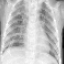

In [60]:
print(y_t[0])
array_to_img(X_t[0])


In [25]:
[# def load_image_cv2(filename, RGB=True):
#     """Loads image using cv2 and converts to either matplotlib-RGB (default)
#     or grayscale."""
#     import cv2

#     IMG = cv2.imread(filename)
#     if RGB: cmap = cv2.COLOR_BGR2RGB
#     else: cmap=cv2.COLOR_BGR2GRAY
#     return cv2.cvtColor(IMG,cmap)

In [47]:
from PIL import Image
from keras.preprocessing import image
from imageio import imread
from skimage.transform import resize
import cv2
from tqdm import tqdm
from keras.utils import to_categorical

# defining a function to read images
def read_img(img_path,target_size=(32,32,3)):#(64, 64, 3)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)

    return img

# def load_train_test_val(dog_training_filenames, cat_training_filenames,
#                         dog_test_filenames,cat_test_filenames,
#                         img_size=(32,32,3),val_size=0.1):
#     """Reads in training and test filenames to produce X and y data splits.
#     The validation set is intended to be used during training and is created
#     from the training images using train test split.

#     ylabels are encoded as 0=cat, 1=dog
#     Returns:  X_train, X_test, X_val, y_train, y_test,y_val"""
#     # 
    
#     display('[i] LOADING IMAGES')
 
#     train_img = []
#     train_label = []

#     for img_path in tqdm(dog_training_filenames):
#         train_img.append(read_img(img_path,target_size=img_size))
#         train_label.append(1)

#     for img_path in tqdm(cat_training_filenames):
#         train_img.append(read_img(img_path,target_size=img_size))
#         train_label.append(0)


#     test_img = []
#     test_label = []

#     for img_path in tqdm(dog_test_filenames):
#         test_img.append(read_img(img_path,target_size=img_size))
#         test_label.append(1)

#     for img_path in tqdm(dog_test_filenames):
#         test_img.append(read_img(img_path,target_size=img_size))
#         test_label.append(0)
#     # print('\n',pd.Series(train_label).value_counts())


#     from sklearn.model_selection import train_test_split
#     X = np.array(train_img, np.float32)
#     y = np.array(train_label)
#     y = to_categorical(y)
    
#     X_test = np.array(test_img, np.float32)
#     y_test = to_categorical(np.array(test_label))
#     X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.1)
#     print('\n[i] Length of Splits:')
#     print(f"X_train={len(X_train)}, X_test={len(X_test)}, X_val={len(X_val)}")
#     return X_train, X_test, X_val, y_train, y_test,y_val 


# def train_test_val_datagens(X_train,X_test,X_val,y_train,y_test,y_val,
#                             BATCH_SIZE = 32, train_datagen_kws= dict(
#                                 shear_range = 0.2, 
#                                 zoom_range = 0.2,
#                                 horizontal_flip = True)):
#     """Creates ImageDataGenerators for train,test,val data.
#     Returns: training_set,test_set,val_set"""
#     ## Create training and test data
#     from keras.preprocessing.image import ImageDataGenerator

#     train_datagen = ImageDataGenerator(rescale = 1./255,**train_datagen_kws)

#     test_datagen = ImageDataGenerator(rescale = 1./255)
#     val_datagen = ImageDataGenerator(rescale = 1./255)

#     training_set = train_datagen.flow(X_train,y=y_train,batch_size=BATCH_SIZE)
#     test_set = test_datagen.flow(X_test,y=y_test,batch_size=BATCH_SIZE)
#     val_set = val_datagen.flow(X_val,y=y_val,batch_size=BATCH_SIZE)

#     return training_set,test_set,val_set



def get_shapes_dict(training_set,verbose=False):
    shapes = ["Batchsize", "img_width","img_height","img_dim"]
    SHAPES = dict(zip(shapes, training_set[0][0].shape))
    if verbose:
        print('SHAPES DICT:')
        print(SHAPES)
        print(training_set[0][0].shape)
        print('\n[i] Labels for batch (0=cat,1=dog)')
        print(training_set[0][1])
    return SHAPES
      

In [48]:
# ## USING FUNCTIONS TO LOAD IN IMAGES 
# X_train,X_test,X_val,y_train,y_test,y_val = load_train_test_val(*all_filename_vars,
#                                                   val_size=0.1,img_size=(32,32,3))#(64,64,3))


In [49]:
import inspect
inspect.getsourcefile(load_img)

'/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/keras/preprocessing/image.py'

In [50]:
# img = load_img(normal_train_files[0])
# img

(32, 32, 3)


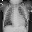

In [18]:
print(X_train[0].shape)
array_to_img(X_train[0])
# plt.title(f"{y_train[0]}")

In [19]:
# def complete_image_processing(*train_test_filenames,img_size=(64,64,3),val_size=0.1,
#                               BATCH_SIZE = 32, train_datagen_kws= dict(
#                                 shear_range = 0.2, 
#                                 zoom_range = 0.2,
#                                 horizontal_flip = True),verbose=True):
#     """Calls all 3 image prep functions and returns training,test,val datagens,
#     plus SHAPES dict."""    
#     # img_params = list(locals())
#     # print(img_params[1:])
#     # if verbose:
#         # print('\n[i] Creating training ImageDataGenerator using:')
#         # [print(f"{img_params[i]}") for i in range(len(img_params))];


#     # print(len(train_test_filenames))
#     if len(train_test_filenames) != 4:
#         raise Exception('Must provide 4 filenames dog_train_files, cat_train_files,dog_test_files,cat_test_files')
#     train_test_val_vars = load_train_test_val(
#         *train_test_filenames, val_size=0.1,img_size=img_size)

#     training_set,test_set,val_set = train_test_val_datagens(*train_test_val_vars,
#                                                             BATCH_SIZE=BATCH_SIZE)

#     SHAPES = get_shapes_dict(training_set)

#     # print(pd.Series())

#     return training_set,test_set,val_set,SHAPES



# training_set,test_set,val_set,SHAPES = \
# complete_image_processing(*all_filename_vars, img_size=(64,64,3),BATCH_SIZE=64)

### Adding back loading for flow

- https://discuss.analyticsvidhya.com/t/keras-image-preprocessing-using-flow-and-not-flow-from-directory/69460/2


In [61]:
# train_test_val_vars = [X_train,X_test,X_val,y_train,y_test,y_val ]

# training_set,test_set,val_set = train_test_val_datagens(*train_test_val_vars,
#                                                         BATCH_SIZE=128)

In [21]:
training_set

## Using ImageDataGenerator and .flow

In [62]:
# IMG_SIZE=(64,64)
# BATCH_SIZE = 128
# VAL_SPLIT = 0.2


# ## Make training/validation generator and then get training/val sets
# train_datagen =  ImageDataGenerator(rescale=1./255, 
#                                      shear_range = 0.2, 
#                                     zoom_range = 0.2,
#                                      horizontal_flip = True,
#                                     validation_split=VAL_SPLIT)

# # Training Data 
# training_set = train_datagen.flow(X_train,y_train, batch_size=BATCH_SIZE,
#                                   subset='training',seed=321)


# # Val Data
# val_set = train_datagen.flow(X_train,y_train, batch_size=BATCH_SIZE,
#                                   subset='validation',seed=321)

# # Test data
# test_set = ImageDataGenerator(rescale = 1./255).flow(X_test,y_test)
# # train_datagen.flow(X_train,y_train, batch_size=BATCH_SIZE,subset='training',seed=321)
#                                                 #    target_size=IMG_SIZE,
# # list(training_set)[:5]

In [23]:

# training_set = train_datagen.flow?



# image_generator =  ImageDataGenerator(validation_split=VAL_SPLIT,rescale=1./255)


# train_datagen =image_augmentor.flow(X_train,
#                                                    batch_size=BATCH_SIZE,
#                                                 #    target_size=IMG_SIZE,
#                                                    subset='training',seed=321
#                                                   )

# val_datagen = image_generator.flow(X_train,
#                                                   batch_size=BATCH_SIZE,
#                                                 #   target_size=IMG_SIZE,
#                                                   subset='validation',seed=321
#                                                   )

# training_set = train_datagen.flow(X_train,y=y_train,batch_size=BATCH_SIZE)
# test_set = test_datagen.flow(X_test,y=y_test,batch_size=BATCH_SIZE)
# val_set = val_datagen.flow(X_val,y=y_val,batch_size=BATCH_SIZE)

# ############ OLD ####

# # test_datagen = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder,
# #                                                                       target_size=IMG_SIZE,
# #                                                                      batch_size=BATCH_SIZE,
# #                                                                      seed=321)

## Sidebar: Trying ".flow_from_directory"

In [45]:
pwd

'/'

In [46]:
ls

bin/                                       etc/     opt/    tensorflow-1.15.2/
boot/                                      gdrive/  proc/   tmp/
chest_xray/                                home/    root/   tools/
content/                                   lib/     run/    usr/
datalab/                                   lib32/   sbin/   var/
dev/                                       lib64/   srv/
dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl  media/   swift/
dlib-19.18.0-cp36-cp36m-linux_x86_64.whl   mnt/     sys/


In [2]:
# data_folder = "chest"

In [1]:
# IMG_SIZE=(32,32)
# BATCH_SIZE = 128
# VAL_SPLIT = 0.2


# image_generator =  ImageDataGenerator(validation_split=VAL_SPLIT,rescale=1./255)
# train_datagen = image_generator.flow_from_directory(data_folder+"train/",
#                                                    batch_size=BATCH_SIZE,
#                                                    target_size=IMG_SIZE,
#                                                    subset='training',seed=321
#                                                   )

# val_datagen = image_generator.flow_from_directory(data_folder+"train/",
#                                                   batch_size=BATCH_SIZE,
#                                                   target_size=IMG_SIZE,
#                                                   subset='validation',seed=321
#                                                   )

# test_datagen = ImageDataGenerator(rescale=1./255).flow_from_directory(data_folder+"test/",
#                                                                       target_size=IMG_SIZE,
#                                                                      batch_size=BATCH_SIZE,
#                                                                      seed=321)

## Modeling Resumed

In [24]:
images = glob.glob(dataset_folder+"train/"+'NORMAL/*')
images[:5]

['chest_xray/train/NORMAL/NORMAL2-IM-0830-0001.jpeg',
 'chest_xray/train/NORMAL/NORMAL2-IM-1343-0001.jpeg',
 'chest_xray/train/NORMAL/NORMAL2-IM-0600-0001.jpeg',
 'chest_xray/train/NORMAL/NORMAL2-IM-1014-0001.jpeg',
 'chest_xray/train/NORMAL/IM-0391-0001.jpeg']

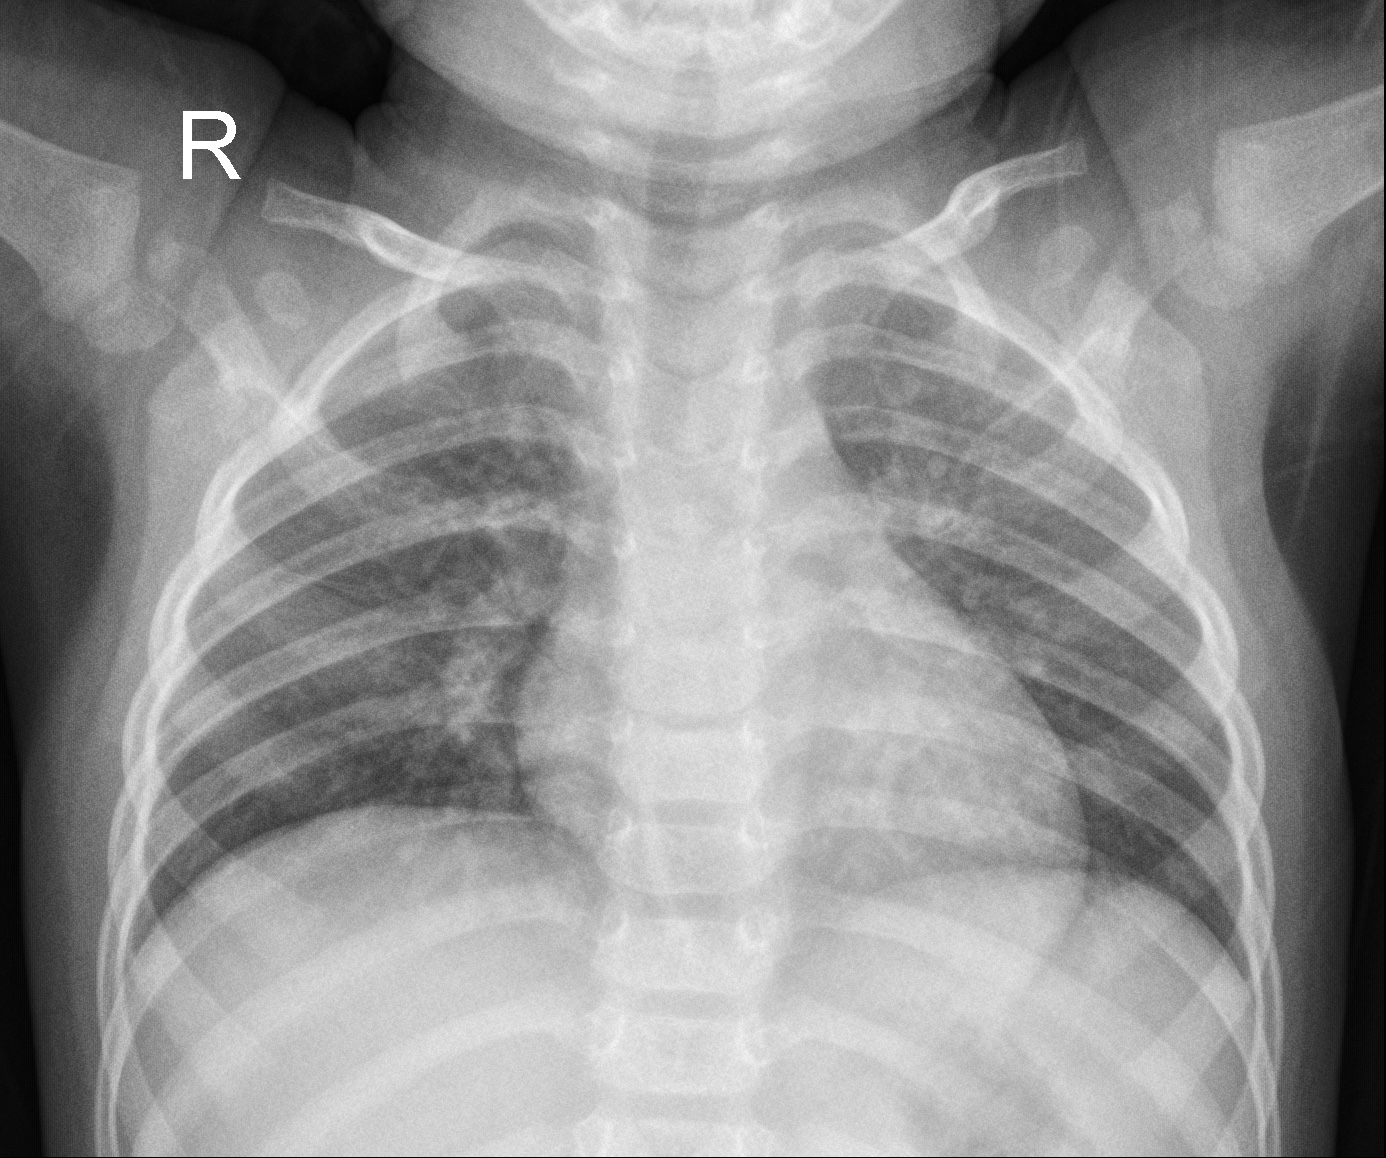

In [25]:
load_img(images[0])

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers,regularizers
from tensorflow.keras import models,layers,optimizers,regularizers,activations
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout

In [64]:
def evaluate_model_gen(model,test_datagen,history=None):
    from sklearn import metrics
    ## Get True Labels, Predictions and Convert to Classes
    test_true = test_datagen.labels
    test_pred = model.predict(test_datagen,
#                               batch_size=test_datagen.batch_size,
                              steps=test_datagen.samples//test_datagen.batch_size+1,
                             verbose=1).argmax(axis=1)
    
    
    
    class_names = list(test_datagen.class_indices.keys())
    
    ## Classification Report
    dashes='---'*20
    print(dashes)
    print('\tCLASSIFICATION REPORT')
    print(dashes)
    print(metrics.classification_report(test_true,
                                        test_pred,
                                       target_names=class_names))
    
    print()
    ## Confusion Matrix
    print(dashes)
    print("\tConfusion Matrix")
    print(dashes)
    display(np.round(metrics.confusion_matrix(test_true,test_pred,normalize='true'),2))
    
    print()
    
    ## Plot training history
    try:
        if history is None:
            history = model.history
            
        plot_history(history)
    except:
        print('[!] No history plotted.')
        
        
        
def plot_history(history):
    
    ## Create history dataframe
    history_df = pd.DataFrame(history.history)
    history_df['Epoch'] = range(1,len(history_df)+1)
    history_df.set_index('Epoch',inplace=True)
    
    # Plot Acc / Loss
    metric_cols = set([col.replace('val_','') for col in history_df.columns])
    
    ## Make figure 
    fig,axes=plt.subplots(nrows=len(metric_cols),figsize=(6,8))
    axes = axes.flatten()
    
    
    plt.suptitle(f"Model Training History",y=1.02)
    idx = 0
    
    for metric_type in metric_cols:
        
        plot_cols = [col for col in history_df.columns if metric_type in col]
        ax = axes[idx]
        
        history_df[plot_cols].plot(ax=ax)
        idx+=1


    ## Create Tick Formatters/Locators
    int_loc = mpl.ticker.MaxNLocator(integer=True)
    fmt = mpl.ticker.ScalarFormatter()
    
    
    # Update Ticks
    [ax.set_xlim(0.5,len(history_df)+0.5) for ax in axes]
    [ax.xaxis.set_major_locator(int_loc) for ax in axes]
    [ax.xaxis.set_major_formatter(fmt)  for ax in axes]

    plt.tight_layout()
    return fig

In [65]:
import tzlocal
from datetime import datetime as dt
time_format = "%D - %I:%M:%S %p"
print(dt.now(tzlocal.get_localzone()).strftime(time_format))

10/21/20 - 04:42:24 PM


## Keras Callbacks



- [Official Callback documentation](https://keras.io/callbacks/)
- CallBacks You'll Definitely Want to Use
 - `keras.callbacks.ModelCheckpoint`
 - `keras.callbacks.EarlyStopping`

- Callbacks worth further exploration
 - `keras.callbacks.callbacks.LearningRateScheduler`
 - `keras.callbacks`

### def callbacks

In [67]:
# def cd_gdrive_mkdirs(model_subfolder='Datasets/Models/cat_vs_dog/'):
#     """cd to /gdrive/My Drive/ to allow for saving files to google drive
#     Also makes all subfolders in 'model_subfolder'"""
    
#     import os
#     ## To save to Gdrive, must first chdir to My Drive (so there's no spaces in fpath)
#     curdir = os.path.abspath(os.curdir)
#     gdrive_folder =r'/gdrive/My Drive/'

#     try:
#         os.chdir(gdrive_folder)
#     except Exception as e:
#         print(f'ERROR: {e}')

#     try:
#         os.makedirs(model_subfolder,exist_ok=True)
#         print(f'Directories created:{model_subfolder}.')
#     except:
#         print('Error making directories')

#     return print(os.path.abspath(os.curdir))


In [68]:
# os.chdir('../')
# print(os.getcwd())
# os.listdir()

In [69]:
# model_subfolder='Data Sets/Mod_4_project/Models/'
# cd_gdrive_mkdirs(model_subfolder=model_subfolder)

# print('\n',model_subfolder)
# os.getcwd()

In [71]:
os.makedirs("models/",exist_ok=True)
def get_callbacks( checkpoint_folder ='models/'):#,prog_bar=True):
    import os
    os.makedirs(checkpoint_folder,exist_ok=True)
    # import tensorflow as tf
    from tensorflow.keras import callbacks
    earlystop = callbacks.EarlyStopping(verbose=1,monitor='val_accuracy',min_delta=0.01, 
                                        patience=3,restore_best_weights=True)
    checkpoint = callbacks.ModelCheckpoint(checkpoint_folder+"weights.{epoch:02d}-{val_accuracy:.2f}.hdf5",
                                           verbose=0)

    callback_list = [earlystop,checkpoint]
#     if prog_bar:
#         from tqdm.keras import TqdmCallback

#         callback_list.append(TqdmCallback(verbose=2))

    return callback_list

In [33]:
# # checkpoint
# from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

# def create_checkpoint(monitor,model_subfolder):#='Datasets/Models/cat_vs_dog/'):
#     filepath=model_subfolder+"weights-improvement-{epoch:02d}-{"+monitor+":.2f}.hdf5"
#     checkpoint = ModelCheckpoint(filepath, monitor=monitor, verbose=1, save_best_only=True, mode='max')
#     return checkpoint

# def create_early_stopping(monitor = 'val_accuracy',min_delta = 0.05, patience = 3,
#                           verbose = 1, restore_best_weights = True):

#     args = locals()
#     earlystop = EarlyStopping(**args)
#     return earlystop


# def get_callbacks(early_stop_kws={}, checkpoint_kws={}):
#     model_subfolder=base_folder+'Models/'
#     os.makedirs(model_subfolder,exist_ok=True)

#     callbacks_list = [create_checkpoint('val_accuracy',
#                                         model_subfolder=model_subfolder,**checkpoint_kws),
#                       create_early_stopping(**early_stop_kws)]
#     return callbacks_list

In [81]:
def make_cnn(img_shape=None, num_conv_layers=1,summary=True):
    if img_shape is None:
        img_shape = training_set.image_shape

        
    model = models.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu',input_shape=img_shape))#(3, 64, 64)))
    # model.add(activationsActivation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    for i in range(num_conv_layers):
        model.add(Conv2D(32, (3, 3),activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(64, (3, 3),activation='relu'))
#     # model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.5))
    # model.add(Activation('relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2,activation='sigmoid'))
    # model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',#'rmsprop',
                  metrics=['accuracy',tf.keras.metrics.Recall()])
    
    if summary:
        import tzlocal
        from datetime import datetime as dt
        time_format = "%D - %I:%M:%S %p"
        now =dt.now(tzlocal.get_localzone()).strftime(time_format)
        display(model.summary())
        print(f"\t- Model was compiled at {now}")
        print()
    return model



In [82]:
classifier=make_cnn()
history =classifier.fit(training_set,
                         steps_per_epoch = 500,
                         epochs = 3,workers=-1,
                         validation_data = val_set,#test_set,
                         validation_steps =100)#,

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                401472    
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)               

None

	- Model was compiled at 10/21/20 - 04:47:34 PM

Epoch 1/3
163/500 [========>.....................] - 77s 475ms/step - loss: 0.5559 - accuracy: 0.7354 - recall_5: 0.7262 - val_loss: 0.6075 - val_accuracy: 0.5000 - val_recall_5: 0.5000


In [86]:
X_train,y_train = training_set[0]
X_train.shape

(32, 64, 64, 3)

In [90]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
clf = KerasClassifier(make_cnn)
clf.fit(X_train,y_train,epochs=20,steps_per_epoch = 500,workers=-1,
                         validation_data = val_set,#test_set,
                         validation_steps =100)#,

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                401472    
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)               

None

	- Model was compiled at 10/21/20 - 04:51:57 PM

Epoch 1/20
500/500 [==============================] - 4s 7ms/step - loss: 0.6498 - accuracy: 0.7080 - recall_8: 0.7020 - val_loss: 0.6767 - val_accuracy: 0.5000 - val_recall_8: 0.5000
Epoch 2/20
140/500 [=======>......................] - 1s 6ms/step - loss: 0.5362 - accuracy: 0.7143 - recall_8: 0.6857


# BOOKMARK - GETTING IMG SHAPE FROM BATCH

In [36]:
# steps_per_epoch = training_set.samples //training_set.batch_size
# steps_per_epoch
X_batch,y_batch = next(training_set)
X_batch.shape, y_batch.shape

((128, 32, 32, 3), (128, 2))

In [37]:
callback_list = get_callbacks()
IMG_SHAPE

NameError: ignored

In [ ]:
## Make and fit Model
model = make_cnn(IMG_SIZE)

### Had to set the steps_per_epoch, batch_size, validation_steps for proper fit
history = model.fit(training_set,
                    steps_per_epoch= 500,#train_datagen.samples//train_datagen.batch_size+1,
                    epochs=10,verbose=1, 
                    batch_size=BATCH_SIZE,#train_datagen.batch_size,
                    validation_data=val_set,
                    validation_steps = 100,#val_datagen.samples //val_datagen.batch_size+1,
                    callbacks=get_callbacks())

In [ ]:
evaluate_model_gen(model, test_datagen,history)

# Installs, Imports, & Functions

In [ ]:
# # !pip install -U imageio
# # !pip install -U scikit-image

# !pip install pillow
# !pip install opencv-contrib-python
# !pip install -U fsds
# !pip install -U tensorflow

# !pip install -U keras
# !pip install -U pandas 
# !pip install -U pandas-profiling

# # %conda update matploltib
# !pip install -U matplotlib

In [ ]:
from PIL import Image
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2

In [ ]:
# !pip install -U fsds_100719
# from fsds_100719.imports import *

# Functions from Class

- Updated plot_keras_history (works with 'acc' or 'accuracy' metric name)
- 

In [ ]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_keras_history(history,figsize=(10,4),subplot_kws={}):
    
    if hasattr(history,'history'):
        history=history.history
    try:
        acc_keys = list(filter(lambda x: 'acc' in x,history.keys()))
    except:
        print('No acc keys found')
        pass
    try:
        loss_keys = list(filter(lambda x: 'loss' in x,history.keys()))
    except:
        print('No loss keys found')

        pass
    
    plot_me = pd.DataFrame(history)
    
    fig,axes=plt.subplots(ncols=2,figsize=figsize,**subplot_kws)
    axes = axes.flatten()

    y_labels= ['Accuracy','Loss']
    for a, metric in enumerate([acc_keys,loss_keys]):
        for i in range(len(metric)):
            ax = pd.Series(history[metric[i]],
                        name=metric[i]).plot(ax=axes[a],label=metric[i])
    [ax.legend() for ax in axes]
    [ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) for ax in axes]
    [ax.set(xlabel='Epochs') for ax in axes]
    plt.suptitle('Model Training Results',y=1.01)
    plt.tight_layout()
    plt.show()
    return plt.gcf()


def plot_confusion_matrix(conf_matrix, classes = None, normalize=True,
                          title='Confusion Matrix', cmap="Blues",
                          print_raw_matrix=False,
                          fig_size=(4,4)):
    """Check if Normalization Option is Set to True. 
    If so, normalize the raw confusion matrix before visualizing
    #Other code should be equivalent to your previous function.
    Note: Taken from bs_ds and modified
    - Can pass a tuple of (y_true,y_pred) instead of conf matrix.
    """
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    import sklearn.metrics as metrics
    
    ## make confusion matrix if given tuple of y_true,y_pred
    if isinstance(conf_matrix, tuple):
        y_true = conf_matrix[0].copy()
        y_pred = conf_matrix[1].copy()
        
        if y_true.ndim>1:
            y_true = y_true.argmax(axis=1)
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)
        cm = metrics.confusion_matrix(y_true,y_pred)
    else:
        cm = conf_matrix
        
    ## Generate integer labels for classes
    if classes is None:
        classes = list(range(len(cm)))  
        
    ## Normalize data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt='.2f'
    else:
        fmt= 'd'
        
        
    fontDict = {
        'title':{
            'fontsize':16,
            'fontweight':'semibold',
            'ha':'center',
            },
        'xlabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'ylabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'xtick_labels':{
            'fontsize':10,
            'fontweight':'normal',
    #             'rotation':45,
            'ha':'right',
            },
        'ytick_labels':{
            'fontsize':10,
            'fontweight':'normal',
            'rotation':0,
            'ha':'right',
            },
        'data_labels':{
            'ha':'center',
            'fontweight':'semibold',

        }
    }

    # Create plot
    fig,ax = plt.subplots(figsize=fig_size)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,**fontDict['title'])
    plt.colorbar()

    tick_marks = classes#np.arange(len(classes))


    plt.xticks(tick_marks, classes, **fontDict['xtick_labels'])
    plt.yticks(tick_marks, classes,**fontDict['ytick_labels'])

    # Determine threshold for b/w text
    thresh = cm.max() / 2.

    # fig,ax = plt.subplots()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 color='darkgray',**fontDict['data_labels']) #color="white" if cm[i, j] > thresh else "black"

    plt.tight_layout()
    plt.ylabel('True label',**fontDict['ylabel'])
    plt.xlabel('Predicted label',**fontDict['xlabel'])

    if print_raw_matrix:
        print_title = 'Raw Confusion Matrix Counts:'
        print('\n',print_title)
        print(conf_matrix)


    fig = plt.gcf()
    return fig


    

class Timer():
    ## def init
    def __init__(self,format_="%m/%d/%y - %I:%M %p"):
        import tzlocal
        self.tz = tzlocal.get_localzone()
        self.fmt = format_
        
        self.created_at = self.get_time()# get time
        

    
    ## def get time method
    def get_time(self):
        import datetime as dt
        return dt.datetime.now(self.tz)

    ## def start
    def start(self):
        time = self.get_time()
        self.start = time
        print(f"[i] Timer started at{self.start.strftime(self.fmt)}")
        
        

    ## def stop
    def stop(self):
        time = self.get_time()
        self.end = time
        print(f"[i] Timer ended at {self.end.strftime(self.fmt)}")
        print(f"- Total time = {self.end-self.start}")

# GridSearchCV


In [ ]:
from sklearn.model_selection._search import BaseSearchCV

from sklearn.model_selection import GridSearchCV,cross_val_score,cross_val_predict
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, recall_score

In [ ]:
from sklearn.metrics import make_scorer
def my_custom_scorer(y_true,y_pred,verbose=True):#,scoring='accuracy',verbose=True):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix"""

    import sklearn.metrics as metrics
    from sklearn.metrics import confusion_matrix
    import numpy as np

    ## reduce dimensions of y_train and y_test
    if y_true.ndim>1:            
        y_true = y_true.argmax(axis=1)

    if y_pred.ndim>1:
        y_pred = y_pred.argmax(axis=1)
        
    evaluate_model(y_true,y_pred)
    print('\n\n')
    return metrics.recall_score(y_true,y_pred,average='weighted')

In [ ]:
def evaluate_gridsearch(search,X_test_img, y_test,verbose=True):
    best_model = search.best_estimator_.model
    if verbose: best_model.summary()
    history = best_model.history.history
    plot_keras_history(history)
    y_hat_test = best_model.predict(X_test_img)
    evaluate_model(y_test,y_hat_test)

    return best_model, y_hat_test

In [ ]:
def make_model_optimized(n_units=64,
                         regularizer='l2', l2_lr = 1e-2,
                         optimizer='sgd',activation='relu',
                         for_gridsearch=True):
    ## Save input args for display
    params=locals()

    ## Display headers
    if for_gridsearch:
        dashes = '---'*25
        print('\n\n')
        print(dashes)
        print(dashes)
        print('[i] Current Params = ',end="{\n")

        [print(f"\t\t{k} : {v},") for k,v in params.items()]
        print("\t\t}")
    
    
    ## Regularization control
    if regularizer =='l2':
        regularizer = regularizers.l2(l2_lr)
    else:
        regularizer = None
    
    model = Sequential()
    model.add(Dense(n_units,activation=activation,
                    input_shape=(X_train_img.shape[1],),
                    kernel_regularizer=regularizer))
    
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer, metrics=['accuracy'])
    if for_gridsearch:
        display(model.summary())
    return model

# make_model_optimized()


In [ ]:
classifier = KerasClassifier(build_fn=make_model_optimized)
callbacks = get_callbacks(early_stop_kws={'patience':10},
                         checkpoint_kws={})
#https://stackoverflow.com/questions/59818584/cannot-clone-object-keras-wrappers
params = dict(n_units=[64],
              optimizer=['rmsprop','adam'],
              epochs=(50,),
              regularizer = [None,'l2'],
              l2_lr  = [1e-2, 1e-3])
#              callbacks=[get_callbacks(early_stop_kws={'patience':10})])

search = GridSearchCV(classifier,params,cv=3,
                      scoring=make_scorer(my_custom_scorer))
search

In [ ]:
search.fit(X_train_img, y_train,
           validation_data=(X_val_img, y_val),
           verbose=2,workers=-1,
          callbacks=callbacks)

search.best_params_

In [ ]:
search.cv_results_

In [ ]:
print(search.best_params_)

evaluate_gridsearch(search,X_test_img,y_test)

# GridSearchFunctions

In [ ]:
fs.ihelp(evaluate_gridsearch)

In [ ]:
# fs.ihelp(plot_confusion_matrix,0)

In [ ]:
def get_cv_results_df(search,keep_splits=False):
    ## Get cv_results
    cv_results = pd.DataFrame(search.cv_results_)
    cv_results.set_index('rank_test_score',inplace=True)
    cv_results.sort_index(inplace=True)
    # cv_results.style.background_gradient(subset='mean_test_score')


    keep_cols = ['mean_test_score','std_test_score',
                 'mean_fit_time','std_fit_time']
    keep_cols.extend([col for col in cv_results.columns if 'param_' in col])
    
    if keep_splits:
        keep_cols.extend([col for col in cv_results.columns if 'split' in col])

    cv_results= cv_results[keep_cols]
    return cv_results

In [ ]:
cv_results= get_cv_results_df(search)
cv_results

In [ ]:
fpath="test/testing/search_results.pdf"
os.path.basename(fpath)
os.path.dirname(fpath)

In [ ]:
import os
## Make individual file paths from fpath base
fpath="output/search_results.pdf"


## Get base filepath and ext seperated
(fbase,ext) = os.path.splitext(fpath)

# ## Make folders if needed
# os.makedirs(os.path.dirname(fpath),exist_ok=True)

# ## Add file suffix for each piece
# filepaths = {}
# filepaths['history'] = fbase+"_history"+ext
# filepaths['conf_matrix'] = fbase+"conf_matrix"+ext
# filepaths['report'] = fbase+'_report'+ext
# filepaths

In [ ]:
def plot_keras_history_new(history,figsize_1=(6,4),
    figsize_2=(8,6)):
    
    ## Make a df from history
    plot_df = pd.DataFrame(history)#history)
    plot_df['Epoch'] = range(1,len(plot_df)+1)
    plot_df.set_index('Epoch',inplace=True)
    ## Get cols for acc vs loss
    acc_cols = list(filter(lambda x: 'acc' in x, plot_df.columns))
    loss_cols = list(filter(lambda x: 'loss' in x, plot_df.columns))   
    
    ## Set figsizes based on number of keys
    if len(acc_cols)>1:
        figsize=figsize_2
    else:
        figsize=figsize_1

    ## Make figure and axes
    fig,ax = plt.subplots(nrows=2,figsize=figsize,sharex=True)
    
    ## Plot Accuracy cols in plot 1
    plot_df[acc_cols].plot(ax=ax[0])
    ax[0].set(ylabel='Accuracy')
    ax[0].set_title('Training Results')

    ## Plot loss cols in plot 2
    plot_df[loss_cols].plot(ax=ax[1])
    ax[1].set(ylabel='Loss')
    ax[1].set_xlabel('Epoch #')


    ## Change xaxis locators 
    [a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(len(plot_df),integer=True)) for a in ax]
    [a.set_xlim((1,len(plot_df)+1)) for a in ax]
    plt.tight_layout()
    
    return fig

In [ ]:
def helper_filepaths(fpath):
    import os
  
    ## Get base filepath and ext seperated
    (fbase,ext) = os.path.splitext(fpath)
    dirname = os.path.dirname(fbase)
    
    if len(dirname)>0:
        ## Make folders if needed
        os.makedirs(dirname,exist_ok=True)

    ## Add file suffix for each piece
    filepaths = {}
    filepath_list = ['history','conf_matrix','report','cv_results']
    for filepath in filepath_list:
        filepaths[filepath] = f"{fbase}_{filepath}{ext}"
        
    return filepaths



def gridsearch_report(search,X_true,y_true,fpath = "search_result.pdf"):
    """PREPARES FULL GRID SEARCH REPORT AND SAVES FILE FOR EMAIL COMPOSITION"""

    from io import StringIO
    import os

    ## Get filepaths
    filepaths= helper_filepaths(fpath)
    
    
    ## Get Best Model, Model History
    best_model = search.best_estimator_.model
    history = best_model.history.history
    
    
    ## Get Predictions and Reports
    # Get Preds
    y_pred = best_model.predict(X_true)
    
    # Convert y-variables to 1D
    if np.ndim(y_pred) >1:
        y_pred = y_pred.argmax(axis=1)
    if np.ndim(y_true) >1:
        y_true = y_true.argmax(axis=1)    
    
    ## Use preds for classification report and conf matrix
    class_report = metrics.classification_report(y_true,y_pred) 
    
     ## Get best params
    grid_res = pd.DataFrame(search.best_params_,index=["Best Params"])
    grid_res['score'] = search.best_score_  
    
    
    ## Print Message:  
    num_dashes=20
    print('---'*num_dashes)
    print('\tGRIDSEARCH REPORT:')
    print('---'*num_dashes)      

    
    
    ### DISPLAY BEST MODEL DETAILS FIRST
    print("\nI. BEST MODEL DETAILS:")
    print('\ni. Best Params:')
    display(grid_res)      
    
    print('\nii. Classification Report:\n')
    print(class_report)
  

    ## Plot and savscoe confusion matrix
    fig_cm = plot_confusion_matrix((y_true,y_pred))
    fig_cm.savefig(filepaths['conf_matrix'],dpi=300,pad_inches=0.6,
                papertype='letter',facecolor='w',edgecolor='w',
                        transparent=False)     
    plt.show()
   
    
    print("\niii. Training History")   
    ## Plot and save keras history
    fig_history = plot_keras_history_new(history)
    fig_history.savefig(filepaths['history'],dpi=300,pad_inches=0.6,
                papertype='letter',facecolor='w',edgecolor='w',
                        transparent=False)   
    plt.show()
   

    ## Get Model Summary
    s = StringIO()
    best_model.summary(print_fn=lambda x: s.write(x + '\n'))
    model_summary = s.getvalue()
    s.close()
    print('\n\niv. Model Summary:\n\n',model_summary)


    ### DISPLAY BIGGER_PICTURE CV RESULTS
    print("\n\nII. GRIDSEARCH DETAILS:")

    ## Param Grid
    param_grid = search.param_grid
    print('\n[i] Param Grid = ',end="{\n")
    [print(f"\t\t{k} : {v},") for k,v in param_grid.items()] 
    print("\t\t}")
    
    ## Get cv_results
    n=5
    cv_results =get_cv_results_df(search)    
    display(cv_results.head(n).style.set_caption(f'Top {n} Params'))
    
    
    ### SCAFFOLDING OF REPORT
    search_details = {}
    search_details['best_score'] = search.best_score_
    search_details['best_params'] = str(search.best_params_)
    search_details['param_grid'] = str(search.param_grid)
    search_details['cv_results'] = get_cv_results_df(search)    
    search_details['model_summary'] = model_summary
    search_details['class_report'] = class_report
    search_details['confusion_matrix'] = fig_cm
    search_details['history'] = fig_history
    
    search_details['model_config'] = best_model.get_config()
    search_details['filepaths'] = filepaths

    return search_details

# OLD WORKFLOW FOR USING FLOW INSTEAD OF DIRECTORY
## Defining Folder Structure

In [ ]:
base_folder = dataset_folder
base_folder

In [ ]:
# ## dataset
# base_folder = r'dogs-vs-cats-sorted/'#My Drive/Datasets/dogs-vs-cats-sorted/'
# os.listdir(base_folder)

## Preparing Images Using .flow instead of flow_from_directory
- https://discuss.analyticsvidhya.com/t/keras-image-preprocessing-using-flow-and-not-flow-from-directory/69460/2


In [ ]:
import shutil
# ## DOG VS CAT
train_base_dir = base_folder+'training_set/'
test_base_dir =base_folder+'test_set/' 

train_dogs = train_base_dir+'dogs/'
train_cats = train_base_dir+'cats/'

test_dogs = test_base_dir+'dogs/'
test_cats = test_base_dir+'cats/'


In [ ]:
if os.listdir(train_base_dir):
    print(True)

In [ ]:
import cv2,glob,os
dog_train_files = glob.glob(train_dogs+'*.jpg')
cat_train_files = glob.glob(train_cats+'*.jpg')
all_train_files = [*dog_train_files,*cat_train_files]

dog_test_files = glob.glob(test_dogs+'*.jpg')
cat_test_files = glob.glob(test_cats+'*.jpg')
all_test_files = [*dog_test_files,*cat_test_files]

# print(len(img_filenames))
# img_filenames[:10]

all_filename_vars = [dog_train_files, cat_train_files,
                        dog_test_files,cat_test_files]

In [ ]:
def load_image_cv2(filename, RGB=True):
    """Loads image using cv2 and converts to either matplotlib-RGB (default)
    or grayscale."""
    import cv2

    IMG = cv2.imread(filename)
    if RGB: cmap = cv2.COLOR_BGR2RGB
    else: cmap=cv2.COLOR_BGR2GRAY
    return cv2.cvtColor(IMG,cmap)

In [ ]:
from PIL import Image
from keras.preprocessing import image
from imageio import imread
from skimage.transform import resize
import cv2
from tqdm import tqdm
from keras.utils import to_categorical

# defining a function to read images
def read_img(img_path,target_size=(32,32,3)):#(64, 64, 3)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)

    return img

def load_train_test_val(dog_training_filenames, cat_training_filenames,
                        dog_test_filenames,cat_test_filenames,
                        img_size=(32,32,3),val_size=0.1):
    """Reads in training and test filenames to produce X and y data splits.
    The validation set is intended to be used during training and is created
    from the training images using train test split.

    ylabels are encoded as 0=cat, 1=dog
    Returns:  X_train, X_test, X_val, y_train, y_test,y_val"""
    # 
    
    display('[i] LOADING IMAGES')
 
    train_img = []
    train_label = []

    for img_path in tqdm(dog_training_filenames):
        train_img.append(read_img(img_path,target_size=img_size))
        train_label.append(1)

    for img_path in tqdm(cat_training_filenames):
        train_img.append(read_img(img_path,target_size=img_size))
        train_label.append(0)


    test_img = []
    test_label = []

    for img_path in tqdm(dog_test_files):
        test_img.append(read_img(img_path,target_size=img_size))
        test_label.append(1)

    for img_path in tqdm(dog_test_files):
        test_img.append(read_img(img_path,target_size=img_size))
        test_label.append(0)
    # print('\n',pd.Series(train_label).value_counts())


    from sklearn.model_selection import train_test_split
    X = np.array(train_img, np.float32)
    y = np.array(train_label)
    y = to_categorical(y)
    
    X_test = np.array(test_img, np.float32)
    y_test = to_categorical(np.array(test_label))
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.1)
    print('\n[i] Length of Splits:')
    print(f"X_train={len(X_train)}, X_test={len(X_test)}, X_val={len(X_val)}")
    return X_train, X_test, X_val, y_train, y_test,y_val 


def train_test_val_datagens(X_train,X_test,X_val,y_train,y_test,y_val,
                            BATCH_SIZE = 32, train_datagen_kws= dict(
                                shear_range = 0.2, 
                                zoom_range = 0.2,
                                horizontal_flip = True)):
    """Creates ImageDataGenerators for train,test,val data.
    Returns: training_set,test_set,val_set"""
    ## Create training and test data
    from keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale = 1./255,**train_datagen_kws)

    test_datagen = ImageDataGenerator(rescale = 1./255)
    val_datagen = ImageDataGenerator(rescale = 1./255)

    training_set = train_datagen.flow(X_train,y=y_train,batch_size=BATCH_SIZE)
    test_set = test_datagen.flow(X_test,y=y_test,batch_size=BATCH_SIZE)
    val_set = val_datagen.flow(X_val,y=y_val,batch_size=BATCH_SIZE)

    return training_set,test_set,val_set



def get_shapes_dict(training_set,verbose=False):
    shapes = ["Batchsize", "img_width","img_height","img_dim"]
    SHAPES = dict(zip(shapes, training_set[0][0].shape))
    if verbose:
        print('SHAPES DICT:')
        print(SHAPES)
        print(training_set[0][0].shape)
        print('\n[i] Labels for batch (0=cat,1=dog)')
        print(training_set[0][1])
    return SHAPES
      

In [ ]:
## USING FUNCTIONS TO LOAD IN IMAGES 
X_train,X_test,X_val,y_train,y_test,y_val = load_train_test_val(*all_filename_vars,
                                                  val_size=0.1,img_size=(32,32,3))#(64,64,3))

train_test_val_vars = [X_train,X_test,X_val,y_train,y_test,y_val ]


In [ ]:
y_train

In [ ]:
ex_img = X_train[0]
ex_img.shape
ex_img.shape[0] *ex_img.shape[1]*ex_img.shape[2]

In [ ]:
ex_img = X_train[0]
num_images = X_train.shape[0]
num_images_test = X_test.shape[0]
len_unrowed = ex_img.shape[0] *ex_img.shape[1]*ex_img.shape[2]
num_images,num_images_test, len_unrowed

In [ ]:
X_train.shape

In [ ]:
X_train[0].shape, 32*32*3

In [ ]:
X_train_img  = X_train.reshape(num_images,len_unrowed).astype('float32')/255
X_train_img.shape

In [ ]:
X_val_img  = X_val.reshape(X_val.shape[0],len_unrowed).astype('float32')/255
X_val_img.shape

In [ ]:
X_test_img = X_test.reshape(num_images_test,len_unrowed).astype('float32')/255
X_test_img.shape

In [ ]:
# X_train_img = X_train.reshape(-1,32*32*3)/255
# X_test_img = X_test.reshape(-1,32*32*3)/255
# X_train_img.shape, X_test_img.shape

In [ ]:
i = np.random.choice(range(len(y_train)))
display(y_train[i])
display(array_to_img(X_train_img[i].reshape(32,32,3)))

In [ ]:
# Part 1 - Building the CNN
# Importing the Keras libraries and packages
from keras.models import Sequential
# from keras.layers import Conv2D
# from keras.layers import MaxPooling2D
# from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
X_train_img[0].shape

In [ ]:
X_train_img.shape, y_train.shape

In [ ]:
X_train_img[0].shape

In [ ]:
def make_model():
    model = Sequential()
    model.add(Dense(64,activation='relu',input_shape=(X_train_img.shape[1],)))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [ ]:

model = make_model()
model.summary()

In [ ]:
def evaluate_model(y_true, y_pred,history=None):
    
    from sklearn import metrics
    if y_true.ndim>1:
        y_true = y_true.argmax(axis=1)
    if y_pred.ndim>1:
        y_pred = y_pred.argmax(axis=1)   
    try:    
        if history is not None:
            plot_keras_history(history)
    except:
        pass
    
    num_dashes=20
    print('\n')
    print('---'*num_dashes)
    print('\tCLASSIFICATION REPORT:')
    print('---'*num_dashes)
    try:
        print(metrics.classification_report(y_true,y_pred))
        
        fig = plot_confusion_matrix((y_true,y_pred))
        plt.show()
    except Exception as e:
        print(f"[!] Error during model evaluation:\n\t{e}")

    
    


In [ ]:
X_test_img.shape, y_test.shape

In [ ]:
timer = Timer()
model = make_model()
model.summary()
timer.start()
history = model.fit(X_train_img, y_train, epochs=100, batch_size=64, 
                      validation_data=(X_val_img, y_val))
timer.stop()

In [ ]:
y_hat_test = model.predict(X_test_img)

evaluate_model(y_test,y_hat_test,history)

In [ ]:
def make_fit_evaluate_model(build_fn, fit_params = dict(epochs=100,
                                                        batch_size=64)):
    model = build_fn()
    
    timer = Timer()
    model.summary()
    timer.start()
    
    history = model.fit(X_train_img, y_train,**fit_params,
                          validation_data=(X_val_img, y_val))
    timer.stop()
    
    y_hat_test = model.predict(X_test_img)
    evaluate_model(y_test,y_hat_test,history)
    return model,y_hat_test

In [ ]:
fit_model,model_preds = make_fit_evaluate_model(make_model)

In [ ]:
X_val_img

## Trying Regularization

### def make_model_optimized

In [ ]:
from keras import regularizers
def make_model_optimized(n_units=64,regularizer=regularizers.l2(),
                         optimizer='sgd',activation='relu'):
    params=locals()
    dashes = '---'*25
    print(dashes)
    print(dashes)    
    print('[i] Current Params:')
    print(params)
    print()
    
    model = Sequential()

    model.add(Dense(n_units,activation=activation,
                    input_shape=(X_train_img.shape[1],),
                    kernel_regularizer=regularizer))
    
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
make_fit_evaluate_model(make_model_optimized)

In [ ]:
base_folder

In [ ]:
def make_fit_evaluate_model(build_fn, callbacks=None,
                            fit_params = dict(epochs=100,
                                              batch_size=128),verbose=0,):
    model = build_fn()
    
    timer = Timer()
    model.summary()
    timer.start()
    
    history = model.fit(X_train_img, y_train,**fit_params,
                        callbacks=callbacks,
                          validation_data=(X_val_img, y_val),
                        verbose=verbose,
                        workers=-1)
    timer.stop()
    
    y_hat_test = model.predict(X_test_img)
    evaluate_model(y_test,y_hat_test,history)
    return model,y_hat_test

In [ ]:
callbacks_list = get_callbacks(early_stop_kws={'patience':10})
model,preds= make_fit_evaluate_model(make_model_optimized,callbacks=callbacks_list)

In [ ]:
grid_results = gridsearch_report(search,X_test_img,y_test)



### Constructing Email report

#### Adding Attachments Using the email Package

In order to send binary files to an email server that is designed to work with textual data, they need to be encoded before transport. This is most commonly done using base64, which encodes binary data into printable ASCII characters.

The code example below shows how to send an email with a PDF file as an attachment:
```python
import email, smtplib, ssl

from email import encoders
from email.mime.base import MIMEBase
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

subject = "An email with attachment from Python"
body = "This is an email with attachment sent from Python"
sender_email = "my@gmail.com"
receiver_email = "your@gmail.com"
password = input("Type your password and press enter:")

# Create a multipart message and set headers
message = MIMEMultipart()
message["From"] = sender_email
message["To"] = receiver_email
message["Subject"] = subject
message["Bcc"] = receiver_email  # Recommended for mass emails

# Add body to email
message.attach(MIMEText(body, "plain"))

filename = "document.pdf"  # In same directory as script

# Open PDF file in binary mode
with open(filename, "rb") as attachment:
    # Add file as application/octet-stream
    # Email client can usually download this automatically as attachment
    part = MIMEBase("application", "octet-stream")
    part.set_payload(attachment.read())

# Encode file in ASCII characters to send by email    
encoders.encode_base64(part)

# Add header as key/value pair to attachment part
part.add_header(
    "Content-Disposition",
    f"attachment; filename= {filename}",
)

# Add attachment to message and convert message to string
message.attach(part)
text = message.as_string()

# Log in to server using secure context and send email
context = ssl.create_default_context()
with smtplib.SMTP_SSL("smtp.gmail.com", 465, context=context) as server:
    server.login(sender_email, password)
    server.sendmail(sender_email, receiver_email, text)
    ```

In [ ]:
figpath=grid_results['filepaths']['history']

In [ ]:
import os
secret_folder = '/Users/jamesirving/.secret/'
login_info_file = secret_folder+'fsds_notifications_gmail.json'


def get_secret_password(file=None):#='/Users/jamesirving/.secret/gmail.json'):
    if file is None:
        secret_folder = '/Users/jamesirving/.secret/'
        file = secret_folder+'fsds_notifications_gmail.json'

    with open(file) as file:
        import json
        gmail = json.load(file)
    print(gmail.keys())
    return gmail

gmail = get_secret_password()
# gmail

### Sending emails with Python

- https://realpython.com/python-send-email/


In [ ]:
# import required packages
import smtplib,ssl
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase

from email.mime.text import MIMEText
from email.mime.image import MIMEImage
from email import encoders


sender_email = gmail['username']
receiver_email = "james.irving@flatironschool.com"
password = gmail['password']

message = MIMEMultipart("alternative")
message["Subject"] = "multipart test"
message["From"] = sender_email
message["To"] = receiver_email


# Create the plain-text and HTML version of your message
text = """\
Hello, 
This is a test email sent via python that should contain HTML + plain text."""

html = """\
<html>
 <head><h1>Test Email</h1></head>
  <body>
    <p>Hello,<br>
       This is a test email sent via python that should contain HTML + plain text.<br>
    </p>
  </body>
</html>
"""

# Turn these into plain/html MIMEText objects
part1 = MIMEText(text, "plain")
part2 = MIMEText(html, "html")

# Add HTML/plain-text parts to MIMEMultipart message
# The email client will try to render the last part first
message.attach(part1)
message.attach(part2)

In [ ]:
# for file in list_of_files:
filename = figpath# In same directory as script

# Open PDF file in binary mode
with open(filename, "rb") as attachment:
    # Add file as application/octet-stream
    # Email client can usually download this automatically as attachment
    part = MIMEBase("application", "octet-stream")
    part.set_payload(attachment.read())

# Encode file in ASCII characters to send by email    
encoders.encode_base64(part)

# Add header as key/value pair to attachment part
part.add_header(
    "Content-Disposition",
    f"attachment; filename= {filename}",
)

# Add attachment to message and convert message to string
message.attach(part)

In [ ]:
# Create secure connection with server and send email
context = ssl.create_default_context()
with smtplib.SMTP_SSL("smtp.gmail.com", 465, context=context) as server:
    server.login(sender_email, password)
    server.sendmail(
        sender_email, receiver_email, message.as_string()
    )

In [ ]:
# filename = figpath# In same directory as script

# # Open PDF file in binary mode
# with open(filename, "rb") as attachment:
#     # Add file as application/octet-stream
#     # Email client can usually download this automatically as attachment
#     part = MIMEBase("application", "octet-stream")
#     part.set_payload(attachment.read())

# # Encode file in ASCII characters to send by email    
# encoders.encode_base64(part)

# # Add header as key/value pair to attachment part
# part.add_header(
#     "Content-Disposition",
#     f"attachment; filename= {filename}",
# )

# # Add attachment to message and convert message to string
# message.attach(part)

In [ ]:
# def email_notification(password_obj=None,recipient=None,subject='GridSearch Finished',
#                        msg='The GridSearch is now complete.'):
#     """Sends email notification from gmail account using previously encrypyted password  object (an instance
#     of EncrypytedPassword). 
#     Args:
#         password_obj (dict): Login info dict with keys: username,password.
#         subject (str):Text for subject line.
#         msg (str): Text for body of email. 

#     Returns:
#         Prints `Email sent!` if email successful. 
#     """
#     if password_obj is None:
#         gmail = get_secret_password()
#     else:
#         assert ('username' in password_obj)&('password' in password_obj)
#         gmail = password_obj
        
#     if isinstance(msg,str)==False:
#         msg=str(msg)
        
    
#     # import required packages
#     import smtplib
#     from email.mime.multipart import MIMEMultipart
#     from email.mime.text import MIMEText
#     from email.mime.image import MIMEImage
#     from email import encoders
    

#     ## WRITE EMAIL
#     message = MIMEMultipart()
#     message['Subject'] =subject
    
#     if send_to is None:
#         recipient = gmail['username']

#     message['To'] = recipient
#     message['From'] = gmail['username']
    
#     message.attach(MIMEText(msg,'plain'))
#     text_message = message.as_string()


#     # Send email request
#     try:
#         with  smtplib.SMTP_SSL('smtp.gmail.com',465) as server:
            
#             server.login(gmail['username'],gmail['password'])
#             server.sendmail(gmail['username'],gmail['username'], text_message)#text_message)
#             server.close()
#             print(f"Email sent to {gmail['username']}!")
        
#     except Exception as e:
#         print(e)
#         print('Something went wrong')
       
       
       

## Lime 

- https://github.com/expectopatronum/code-snippets-blog/blob/master/python/201808_catdog_classifier_lime/analyse-cat-dog-classifier.ipynb

In [ ]:
# # !pip install lime
# import lime
# from lime import lime_image
# from lime import lime_base
# from lime.wrappers.scikit_image import SegmentationAlgorithm
# from skimage.segmentation import mark_boundaries


# explainer = lime_image.LimeImageExplainer()

In [ ]:
# def explain_single_sample(dataset, idx):
#     img_data = dataset[idx][0]
#     data = img_data.reshape(IMG_SIZE,IMG_SIZE,3)
#     model_out = model.predict([data])[0]
#     label = 0
#     label_name = "cat"
#     if model_out[1] > 0.5:
#         label = 1
#         label_name = "dog"
#     explanation = explainer.explain_instance(data, model.predict, top_labels=2, hide_color=None, num_samples=1000)
#     temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=5, hide_rest=True)
#     fig, ax = plt.subplots(1,3)
#     ax[0].imshow(img_data)
#     #plt.subplot(1, 2, 1)
#     ax[1].imshow(mark_boundaries(temp, mask))
#     #plt.show()
#     #plt.subplot(1, 2, 2)
#     temp, mask = explanation.get_image_and_mask(label, positive_only=False, num_features=20, hide_rest=False)
#     ax[2].imshow(mark_boundaries(temp, mask))
#     plt.show()
#     print("label: ", dataset[idx][1], "prediction:", label_name)

# Google Colab Pro

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')